<a href="https://colab.research.google.com/github/Poonam-Majhi/CodeClause_Movie_Recommendation_System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movie Recommendation System Using Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
credits_df = pd.read_csv('tmdb_credits.csv')
movies_df = pd.read_csv('tmdb_movies.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

In [5]:
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâ€™s past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
credits_df.drop(credits_df.columns[4:1261], axis=1, inplace=True)

In [10]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
credits_df.columns = ['movie_id','title','cast','crew']
movies_df = movies_df.merge(credits_df, on="movie_id")

In [12]:
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,6.0,418,Kate & Leopold,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de..."
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Meet the Devil. She's giving Elliott seven wis...,Bedazzled,5.6,512,Bedazzled,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de..."
2,58000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",NaN,2148,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...",en,The Cotton Club,The story of the people that frequented Harlem...,8.590750,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...",...,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was the jazz age. It was an era of elegance...,The Cotton Club,6.6,68,The Cotton Club,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de..."
3,55000000,"[{""id"": 37, ""name"": ""Western""}]",http://www.310toyumathefilm.com/,5176,"[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...",en,3:10 to Yuma,"In Arizona in the late 1800's, infamous outlaw...",48.801089,"[{""name"": ""Tree Line Films"", ""id"": 84}, {""name...",...,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time waits for one man.,3:10 to Yuma,6.9,1188,3:10 to Yuma,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de..."
4,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",http://www.taken3movie.com/,260346,"[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...",en,Taken 3,Ex-government operative Bryan Mills finds his ...,88.844777,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It Ends Here,Taken 3,6.1,2200,Taken 3,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de..."


In [13]:
# Demographic Filtering
C = movies_df["vote_average"].mean()
m = movies_df["vote_count"].quantile(0.9)

print("C: ", C)
print("m: ", m)

new_movies_df = movies_df.copy().loc[movies_df["vote_count"] >= m]
print(new_movies_df.shape)

C:  6.11037851037851
m:  1148.0
(329, 23)


In [14]:
def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]

    return (v/(v + m) * R) + (m/(v + m) * C)

In [15]:
new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)

new_movies_df[["title_x", "vote_count", "vote_average", "score"]].head(10)

,title_x,vote_count,vote_average,score
865,The Shawshank Redemption,8205,8.5,8.206695
2216,Pulp Fiction,8428,8.3,8.037502
2321,The Godfather,5893,8.4,8.026689
974,The Empire Strikes Back,5879,8.2,7.858619
802,Schindler's List,4329,8.3,7.841047
2849,Whiplash,4254,8.3,7.834675
1896,Star Wars,6624,8.1,7.806114
1278,Spirited Away,3840,8.3,7.796053
537,Se7en,5765,8.1,7.769596
1715,The Godfather: Part II,3338,8.3,7.739660


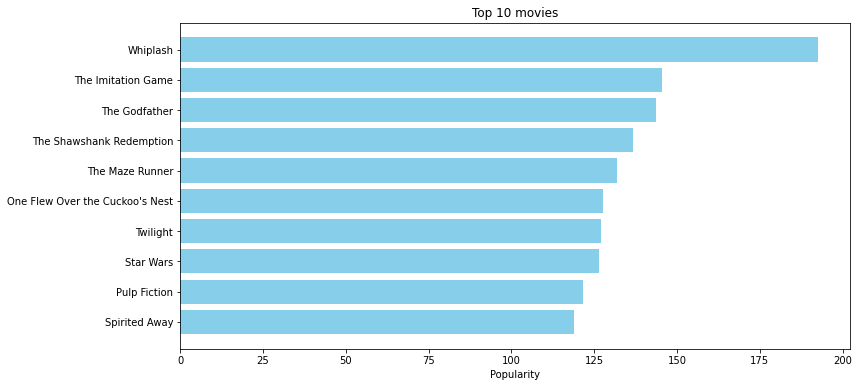

In [16]:
# Plot top 10 movies
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title_x"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()
    

plot()

In [17]:
# Content based Filtering
print(movies_df["overview"].head(5))

0    When her scientist ex-boyfriend discovers a po...
1    Elliot Richardson, suicidal techno geek, is gi...
2    The story of the people that frequented Harlem...
3    In Arizona in the late 1800's, infamous outlaw...
4    Ex-government operative Bryan Mills finds his ...
Name: overview, dtype: object


In [18]:
tfidf = TfidfVectorizer(stop_words="english")
movies_df["overview"] = movies_df["overview"].fillna("")

tfidf_matrix = tfidf.fit_transform(movies_df["overview"])
print(tfidf_matrix.shape)

(3276, 17367)


In [19]:
# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

indices = pd.Series(movies_df.index, index=movies_df["title_x"]).drop_duplicates()
print(indices.head())

(3276, 3276)
title_x
Kate & Leopold     0
Bedazzled          1
The Cotton Club    2
3:10 to Yuma       3
Taken 3            4
dtype: int64


In [20]:
def get_recommendations(title_x, cosine_sim=cosine_sim):
    """
    in this function,
        we take the cosine score of given movie
        sort them based on cosine score (movie_id, cosine_score)
        take the next 10 values because the first entry is itself
        get those movie indices
        map those indices to titles
        return title list
    """
    idx = indices[title_x]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # (a, b) where a is id of movie, b is sim_score

    movies_indices = [ind[0] for ind in sim_scores]
    movies = movies_df["title_x"].iloc[movies_indices]
    return movies

In [21]:
print("################ Content Based Filtering - plot#############")
print()
print("Recommendations for Star Wars")
print(get_recommendations("Star Wars"))
print()
print("Recommendations for The Godfather")
print(get_recommendations("The Godfather"))

################ Content Based Filtering - plot#############

Recommendations for Star Wars
974                      The Empire Strikes Back
474                           Return of the Jedi
274                     Baahubali: The Beginning
1848                                   Arbitrage
1540                          The Princess Bride
1913                History of the World: Part I
29      The Princess Diaries 2: Royal Engagement
1216                                 Topsy-Turvy
2187      Ultramarines: A Warhammer 40,000 Movie
2636                                      Decoys
Name: title_x, dtype: object

Recommendations for The Godfather
1715    The Godfather: Part II
857                 Blood Ties
2711                Easy Money
2607                      Made
2109                    Eulogy
2880                  Sinister
2767                       Joe
1228     The Cold Light of Day
2148             Loose Cannons
2591           The Beastmaster
Name: title_x, dtype: object


In [22]:
features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    movies_df[feature] = movies_df[feature]

movies_df[features].head(10)

,cast,crew,keywords,genres
0,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de...","[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam..."
1,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de...","[{""id"": 2038, ""name"": ""love of one's life""}, {...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na..."
2,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de...","[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...","[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n..."
3,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de...","[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...","[{""id"": 37, ""name"": ""Western""}]"
4,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de...","[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n..."
5,"[{""cast_id"": 1, ""character"": ""Jack Foley"", ""cr...","[{""credit_id"": ""52fe42f2c3a36847f802ef47"", ""de...","[{""id"": 736, ""name"": ""journalist""}, {""id"": 330...","[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ..."
6,"[{""cast_id"": 1, ""character"": ""Cable Guy"", ""cre...","[{""credit_id"": ""52fe4542c3a36847f80c41f1"", ""de...","[{""id"": 378, ""name"": ""prison""}, {""id"": 549, ""n...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
7,"[{""cast_id"": 2, ""character"": ""Dil Navaz"", ""cre...","[{""credit_id"": ""52fe4480c3a36847f8099e81"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 18, ""name"": ""Drama""}]"
8,"[{""cast_id"": 1, ""character"": ""Dick Tracy"", ""cr...","[{""credit_id"": ""52fe44b0c3a36847f80a471d"", ""de...","[{""id"": 417, ""name"": ""corruption""}, {""id"": 853...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
9,"[{""cast_id"": 16, ""character"": ""Thomas Crown"", ...","[{""credit_id"": ""52fe428cc3a36847f8027377"", ""de...","[{""id"": 159520, ""name"": ""martinique""}, {""id"": ...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name..."


In [23]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [24]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [25]:
movies_df["director"] = movies_df["crew"]

features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature]

In [26]:
movies_df[['title_x', 'cast', 'director', 'keywords', 'genres']].head()

,title_x,cast,director,keywords,genres
0,Kate & Leopold,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de...","[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam..."
1,Bedazzled,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de...","[{""id"": 2038, ""name"": ""love of one's life""}, {...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na..."
2,The Cotton Club,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de...","[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...","[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n..."
3,3:10 to Yuma,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de...","[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...","[{""id"": 37, ""name"": ""Western""}]"
4,Taken 3,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de...","[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n..."


In [27]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ""

In [28]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [29]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])


movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    [ { " i d " : 1 8 0 8 , " n a m e " : " l o v ...
1    [ { " i d " : 2 0 3 8 , " n a m e " : " l o v ...
2    [ { " i d " : 1 4 1 6 , " n a m e " : " j a z ...
3    [ { " i d " : 1 5 8 2 , " n a m e " : " s a l ...
4    [ { " i d " : 9 7 4 8 , " n a m e " : " r e v ...
Name: soup, dtype: object


In [30]:
count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])

print(count_matrix.shape)

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim2.shape)

movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title_x'])

(3276, 145729)
(3276, 3276)


In [31]:
print("################ Content Based System - metadata #############")
print("Recommendations for Star Wars")
print(get_recommendations("Star Wars", cosine_sim2))
print()
print("Recommendations for The Godfather")
print(get_recommendations("The Godfather", cosine_sim2))

################ Content Based System - metadata #############
Recommendations for Star Wars
681     Indiana Jones and the Temple of Doom
974                  The Empire Strikes Back
2894                               Slow West
1107                               Spotlight
1972                              The Grudge
1320                               United 93
2142                                   Alien
828                                 The Grey
880                                 EuroTrip
780                                 Brothers
Name: title_x, dtype: object

Recommendations for The Godfather
1715     The Godfather: Part II
1000          The Water Diviner
757                 Mindhunters
880                    EuroTrip
470                The Punisher
1714                 Black Swan
2218               Nightcrawler
1127                 Ghost Ship
154     The Talented Mr. Ripley
32              The Bucket List
Name: title_x, dtype: object
